Early stopping at epoch 150


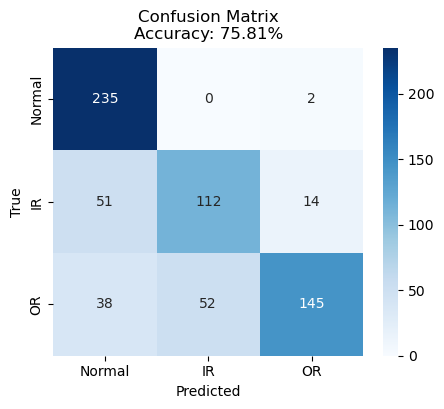

 - Model accuracy: 75.81%


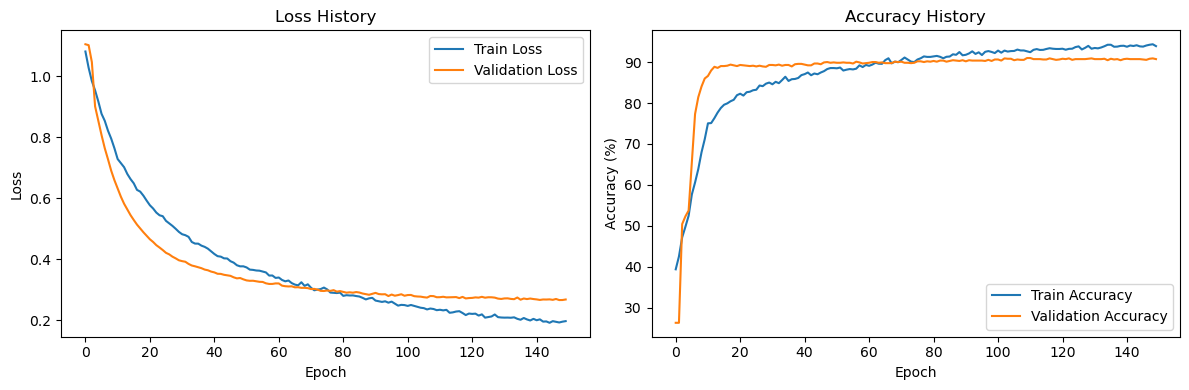

Early stopping at epoch 263


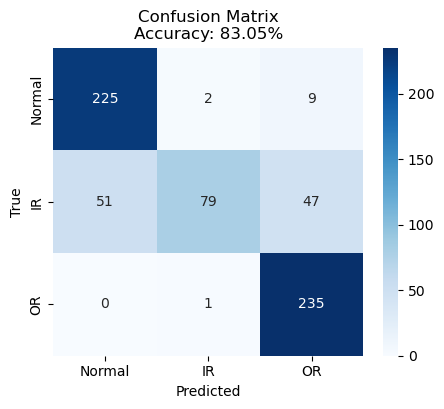

 - Model accuracy: 83.05%


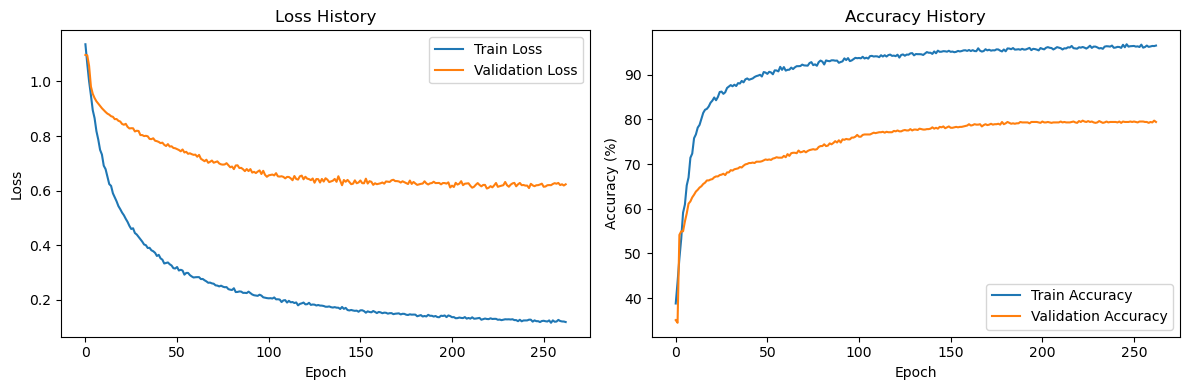

Early stopping at epoch 172


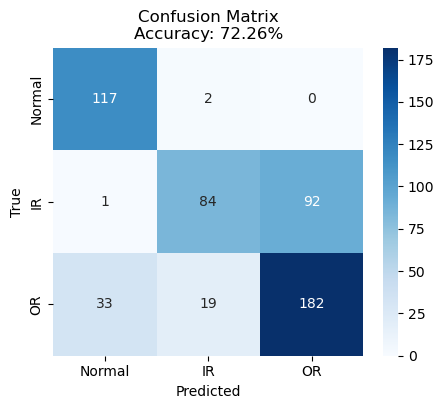

 - Model accuracy: 72.26%


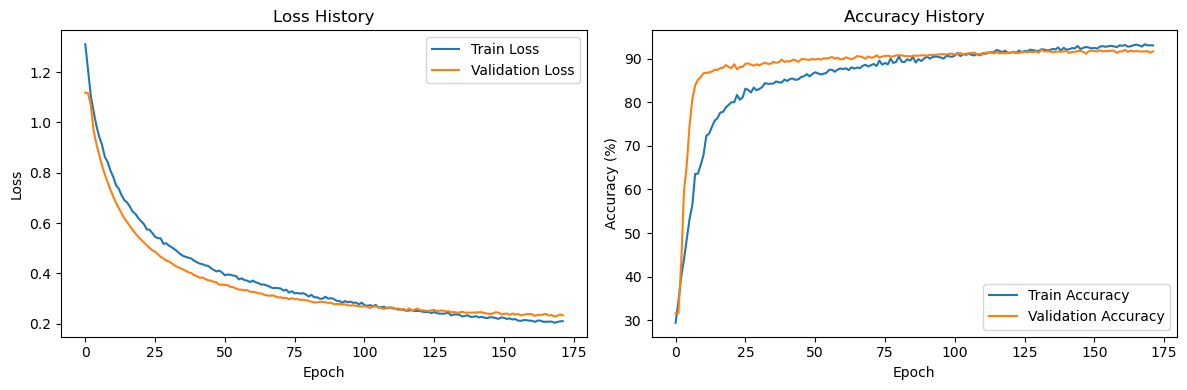

Early stopping at epoch 214


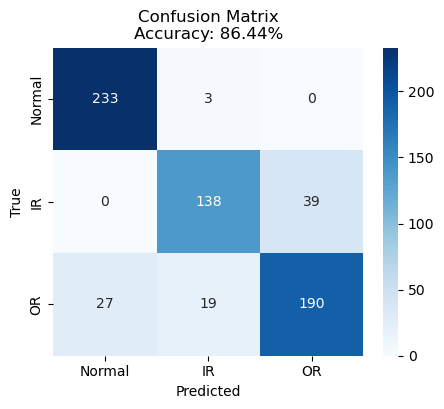

 - Model accuracy: 86.44%


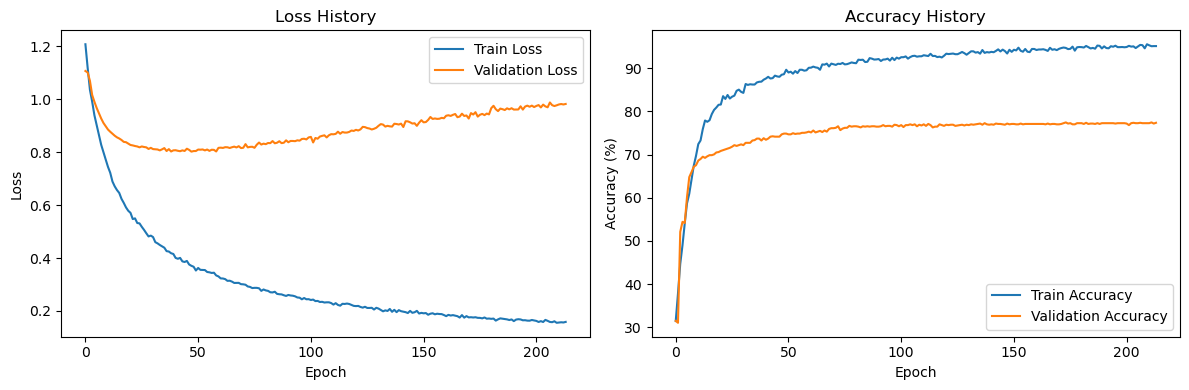

Early stopping at epoch 256


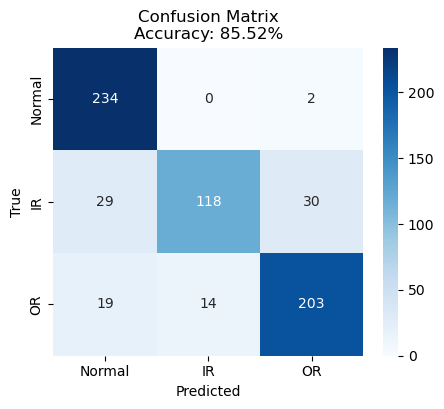

 - Model accuracy: 85.52%


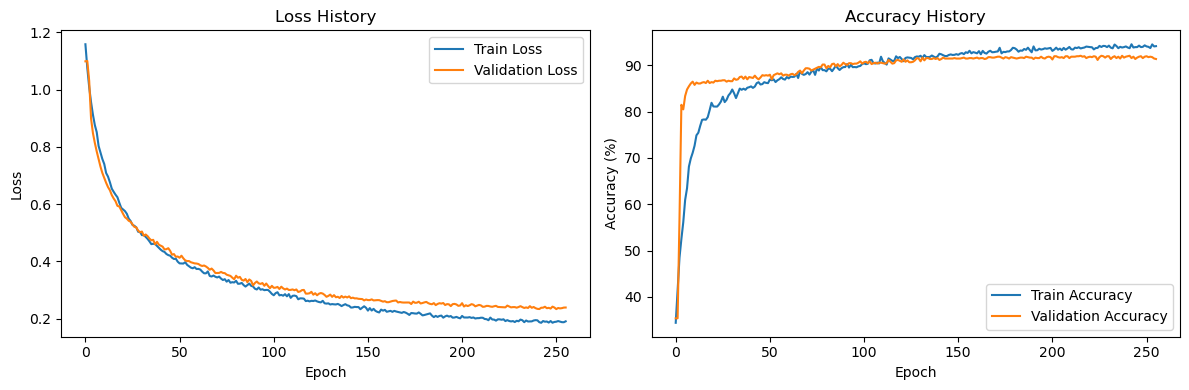

Early stopping at epoch 318


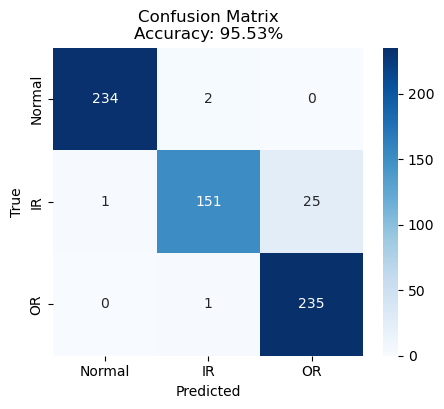

 - Model accuracy: 95.53%


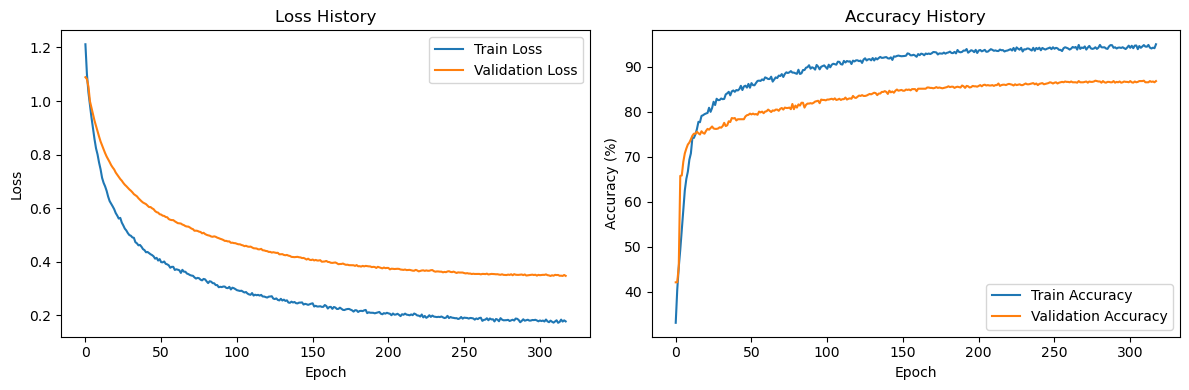

Early stopping at epoch 183


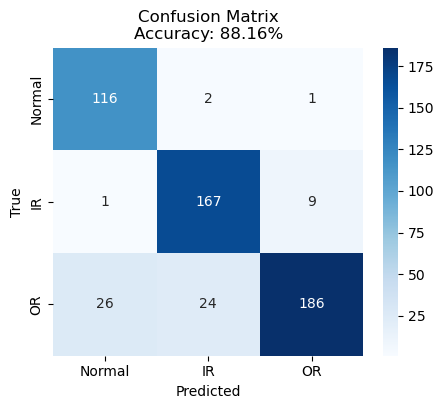

 - Model accuracy: 88.16%


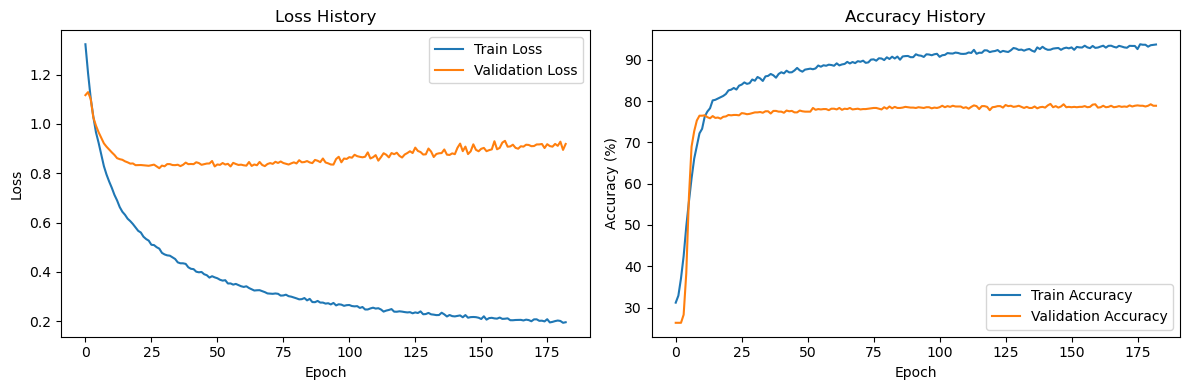

Early stopping at epoch 125


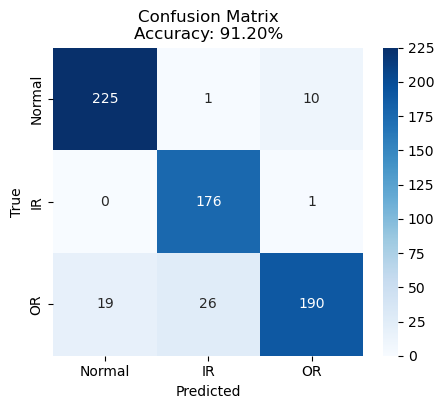

 - Model accuracy: 91.20%


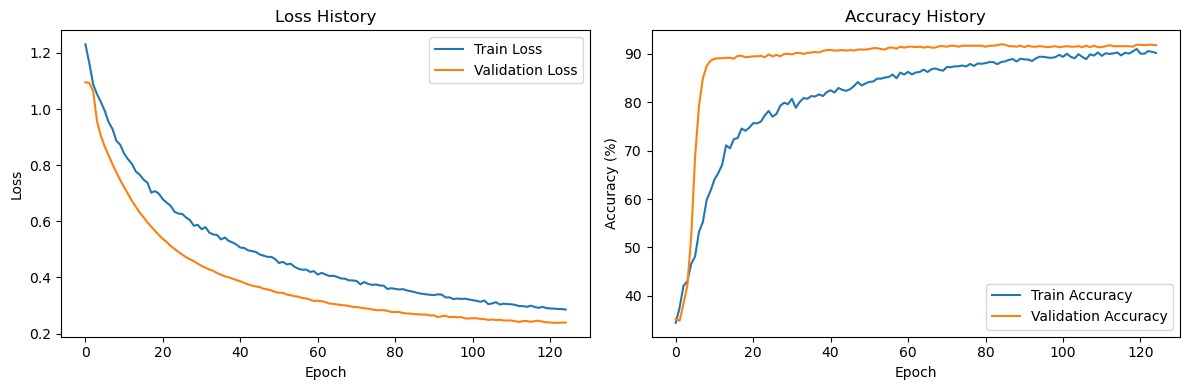

Early stopping at epoch 298


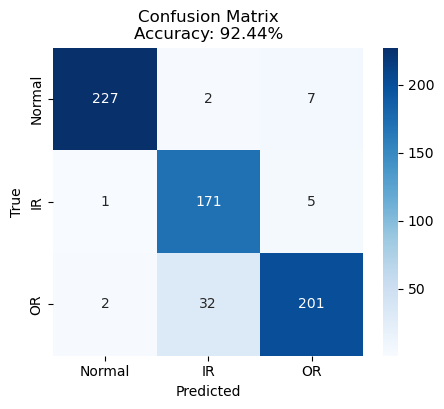

 - Model accuracy: 92.44%


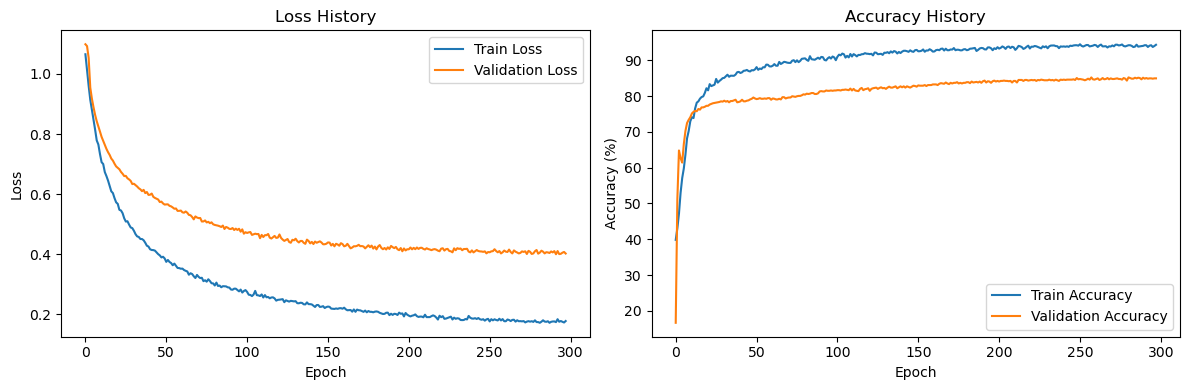

Early stopping at epoch 265


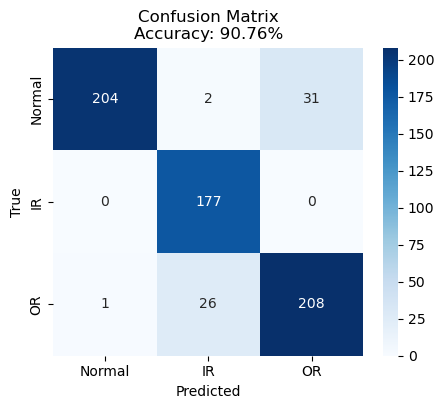

 - Model accuracy: 90.76%


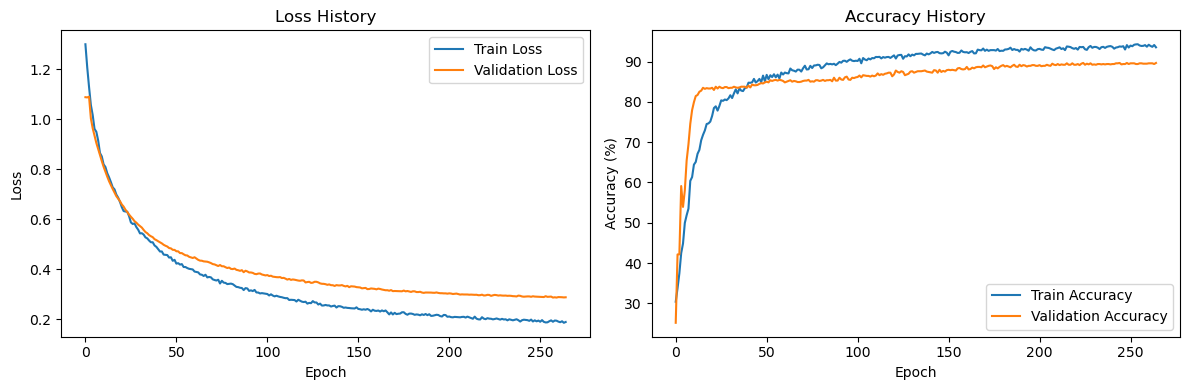

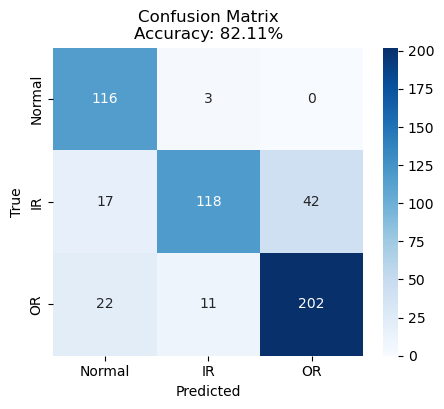

 - Model accuracy: 82.11%


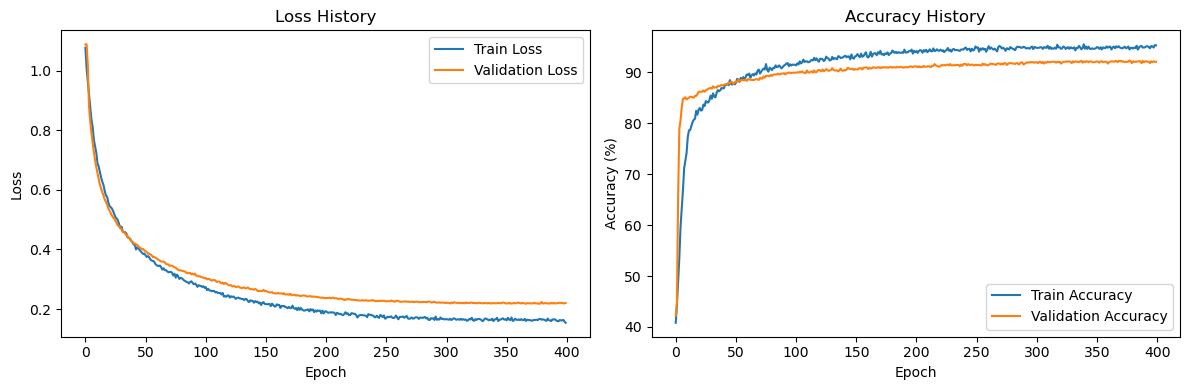

Early stopping at epoch 280


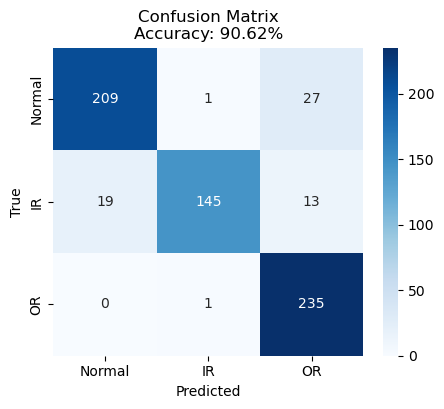

 - Model accuracy: 90.62%


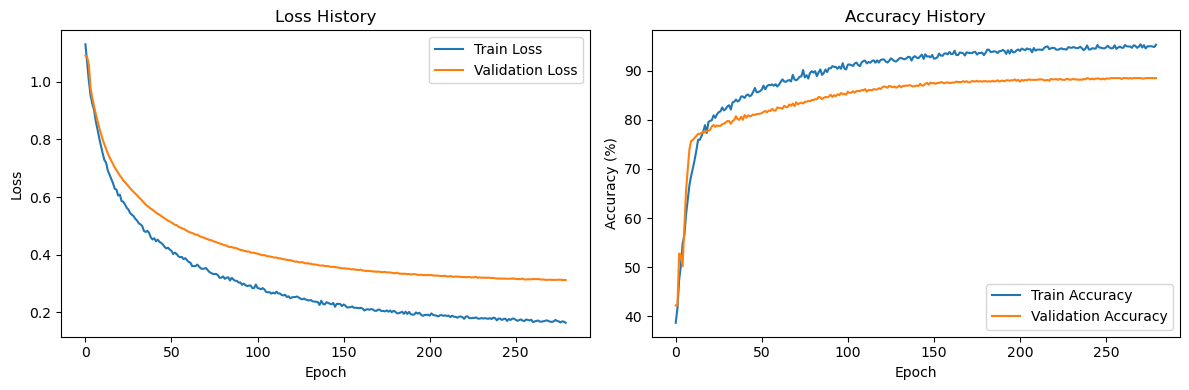

Early stopping at epoch 303


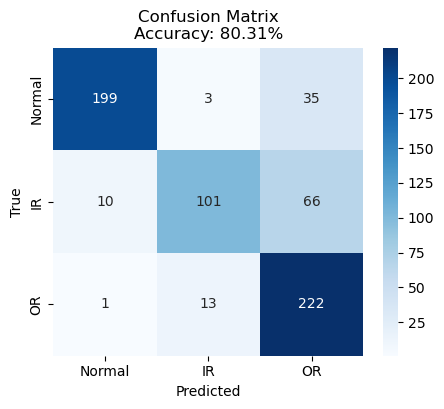

 - Model accuracy: 80.31%


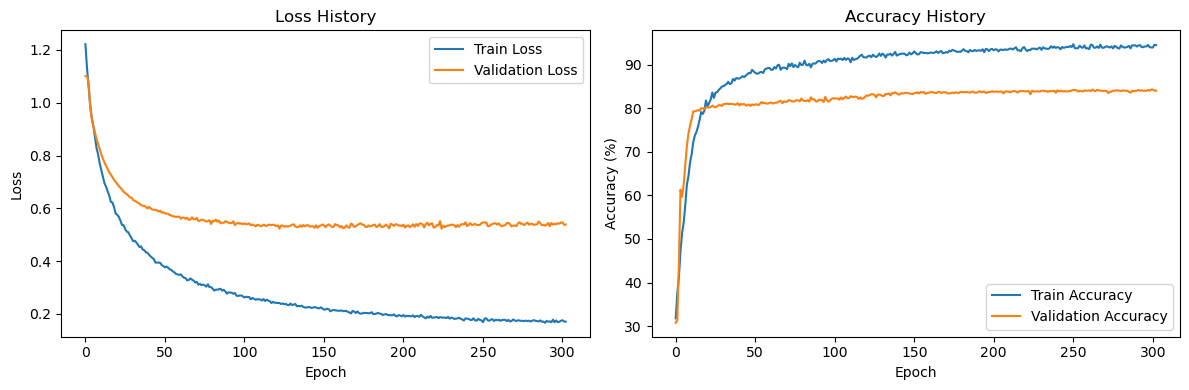

Early stopping at epoch 303


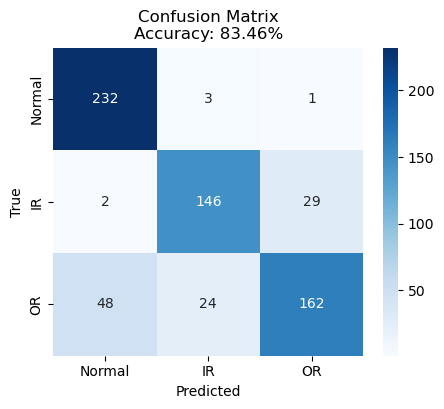

 - Model accuracy: 83.46%


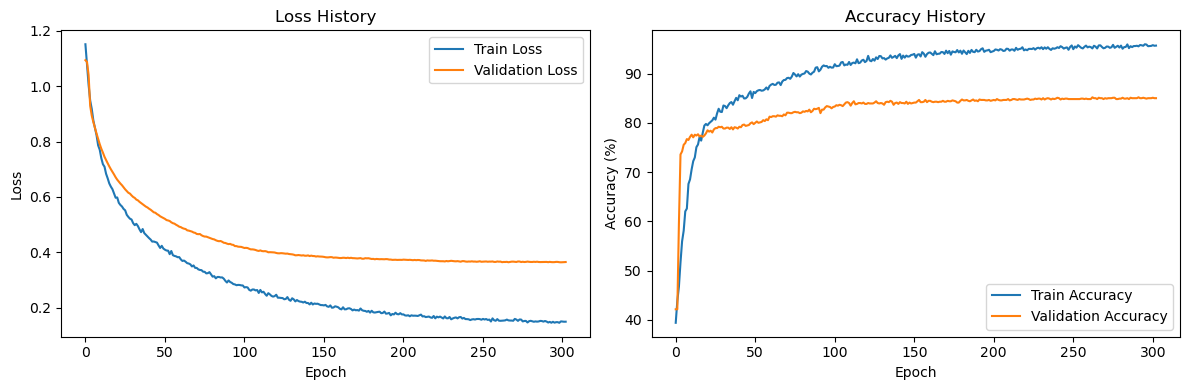

Early stopping at epoch 294


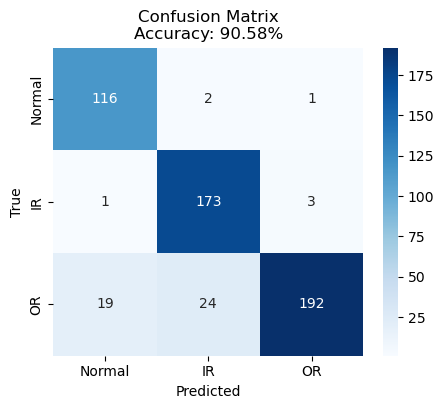

 - Model accuracy: 90.58%


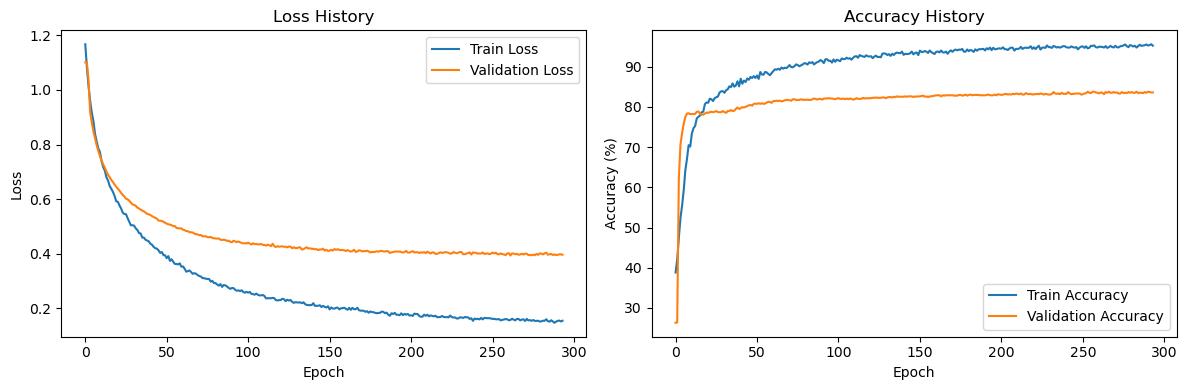

Early stopping at epoch 284


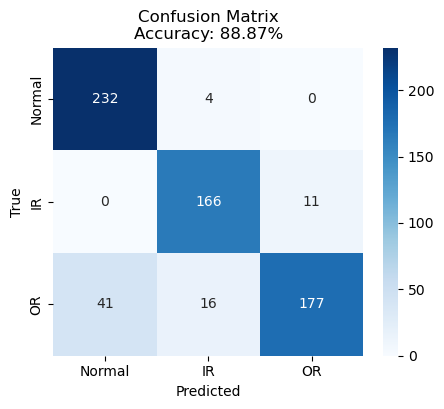

 - Model accuracy: 88.87%


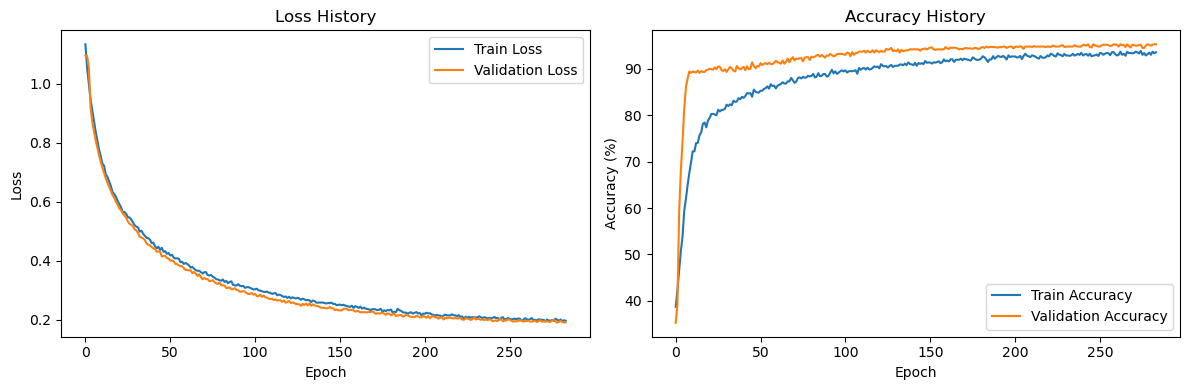

Early stopping at epoch 152


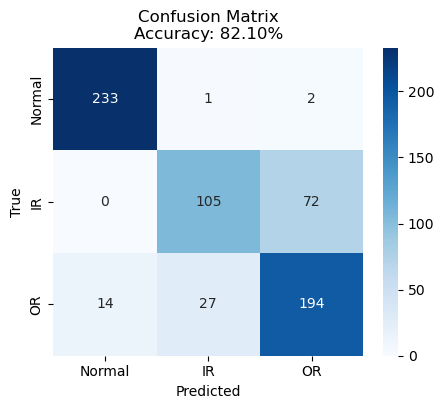

 - Model accuracy: 82.10%


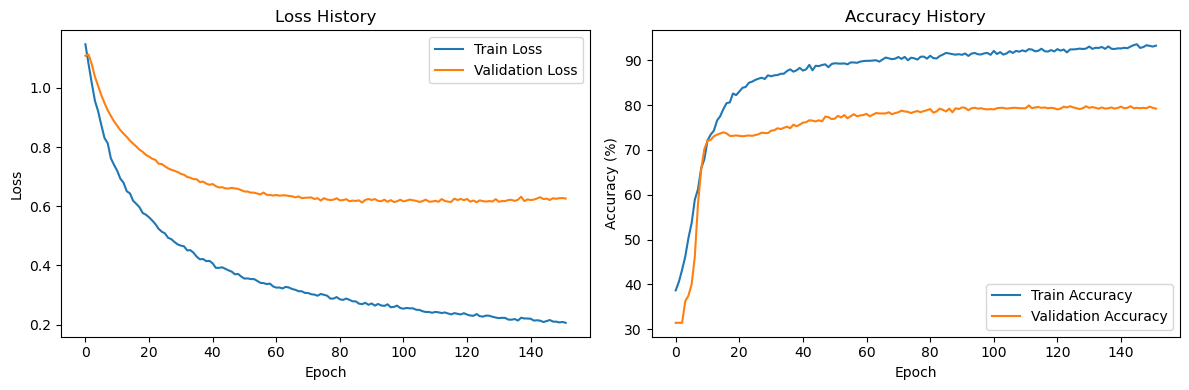

Early stopping at epoch 308


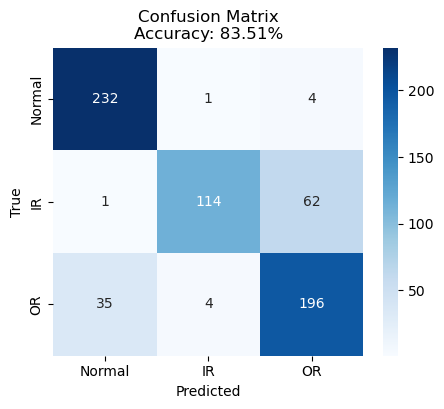

 - Model accuracy: 83.51%


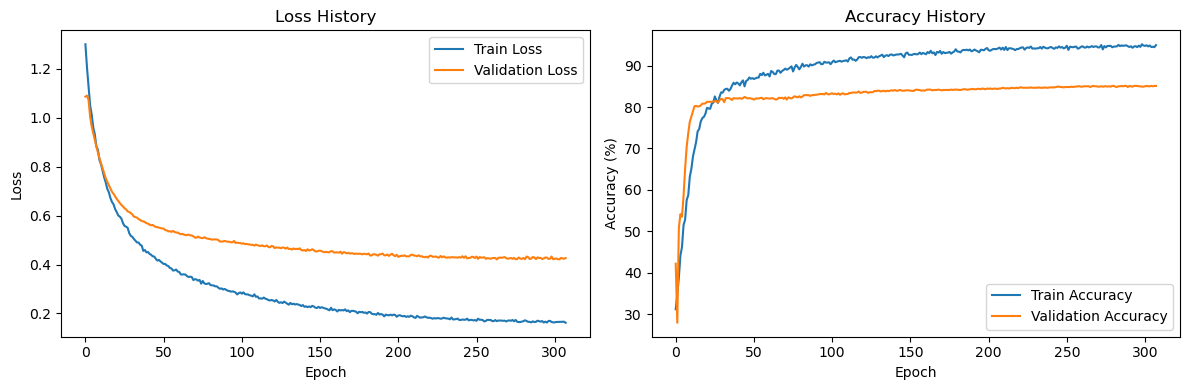

Early stopping at epoch 362


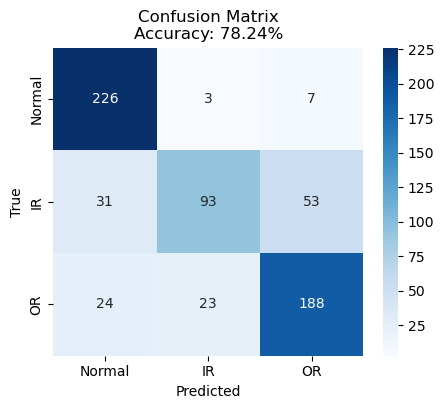

 - Model accuracy: 78.24%


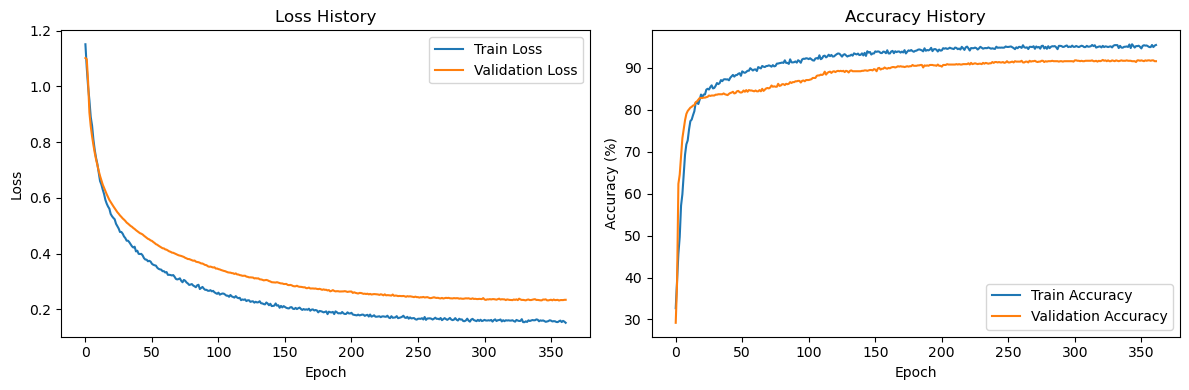

Early stopping at epoch 268


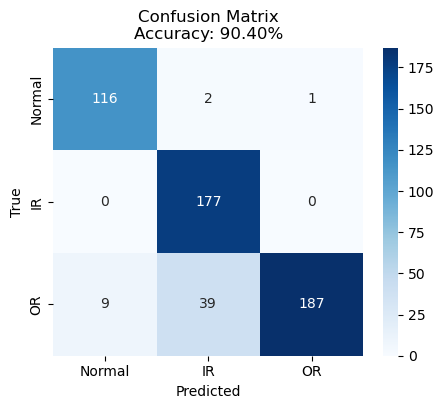

 - Model accuracy: 90.40%


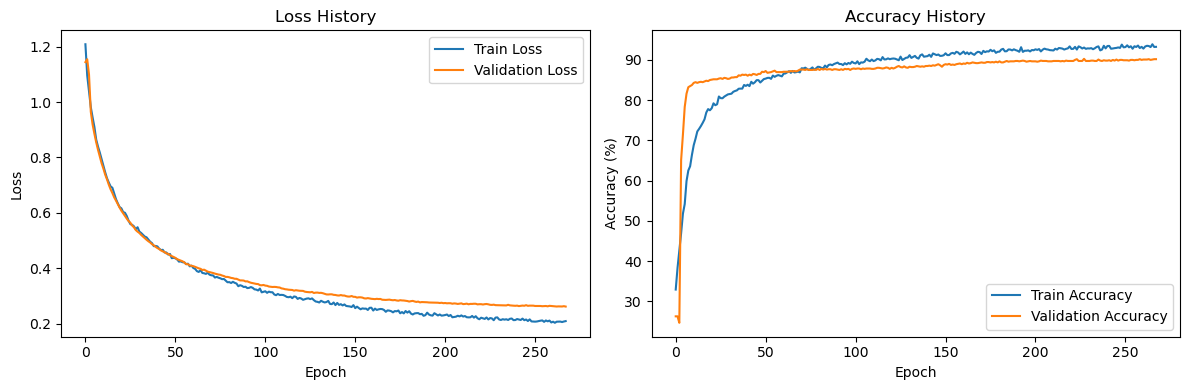

Early stopping at epoch 78


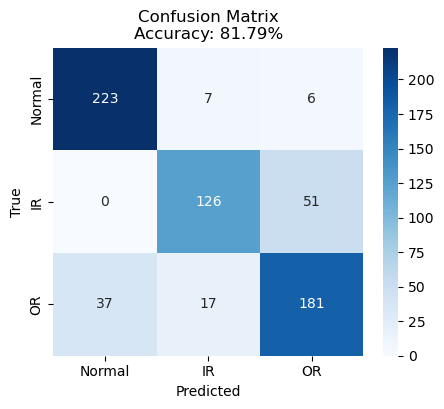

 - Model accuracy: 81.79%


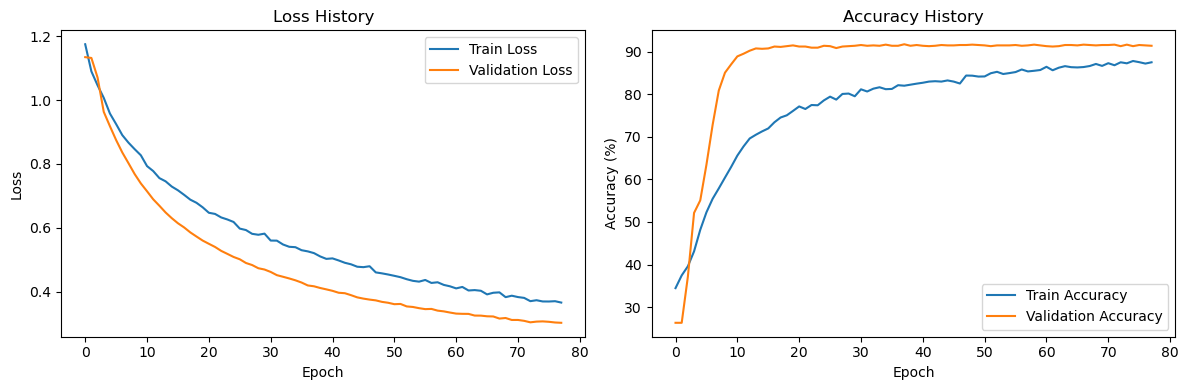

Early stopping at epoch 370


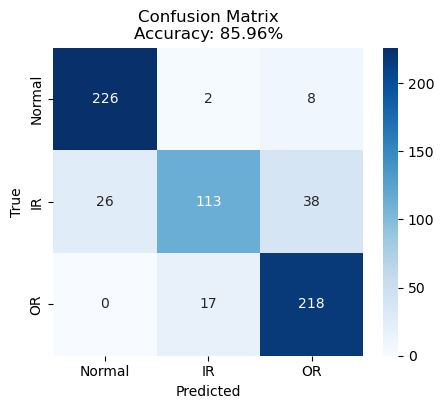

 - Model accuracy: 85.96%


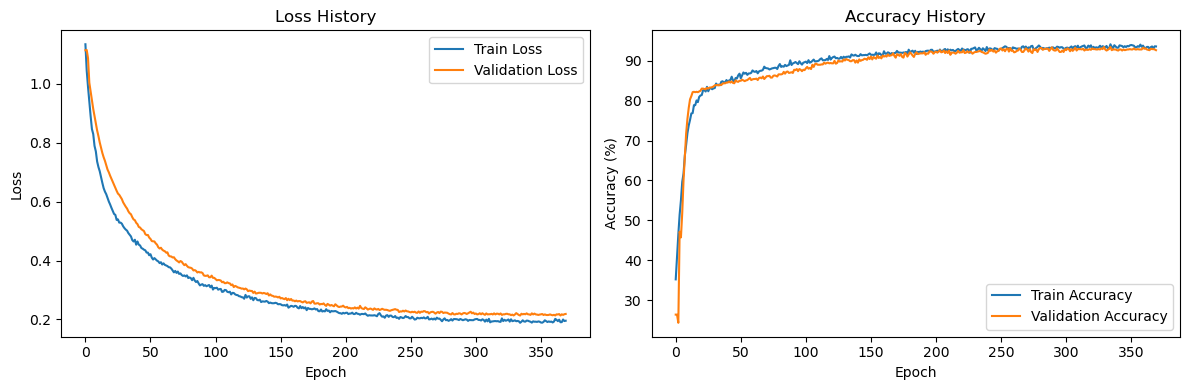

Early stopping at epoch 274


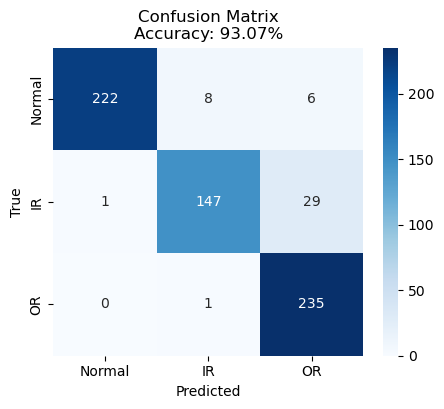

 - Model accuracy: 93.07%


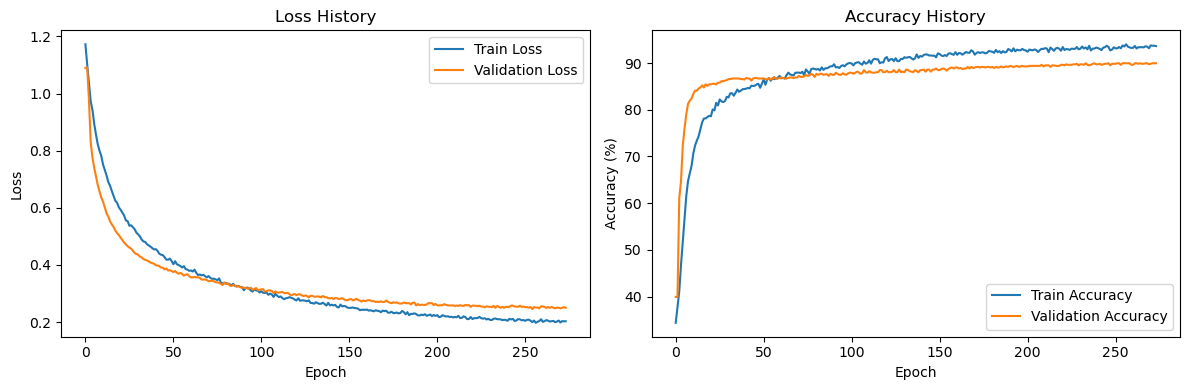

Early stopping at epoch 136


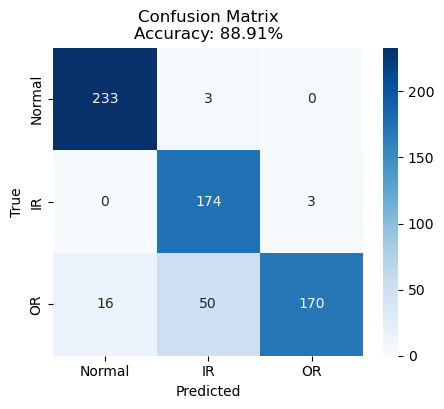

 - Model accuracy: 88.91%


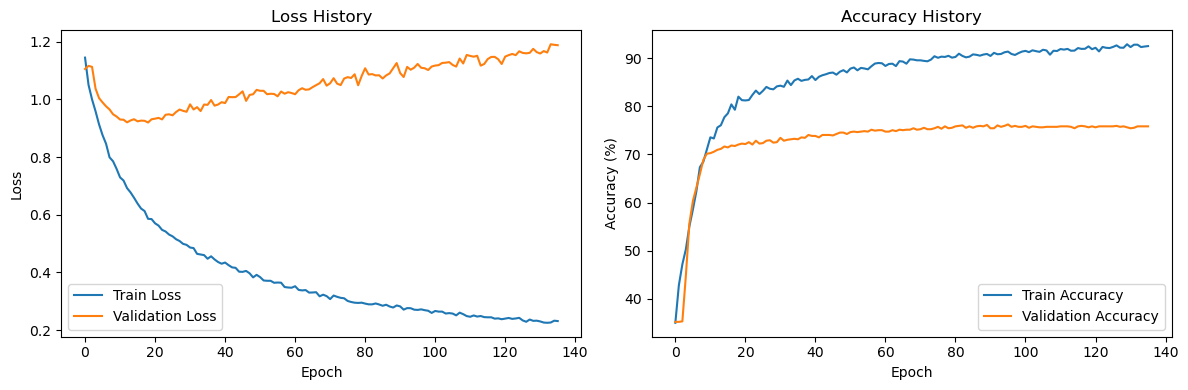

Early stopping at epoch 59


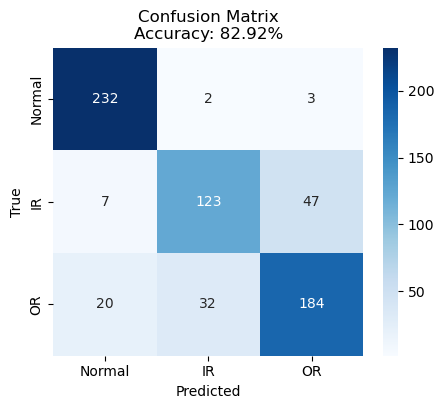

 - Model accuracy: 82.92%


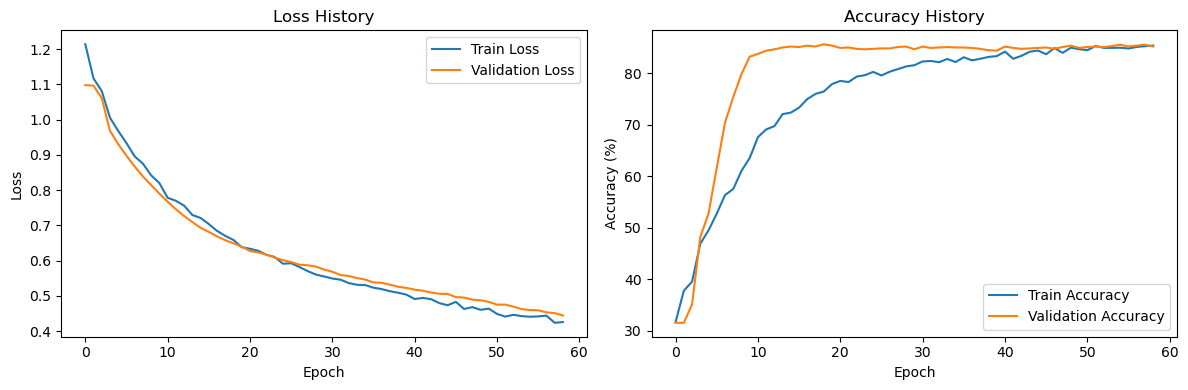

Early stopping at epoch 53


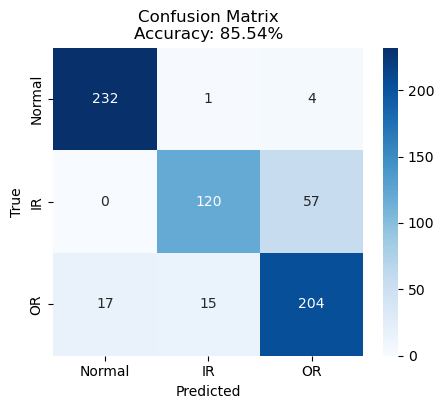

 - Model accuracy: 85.54%


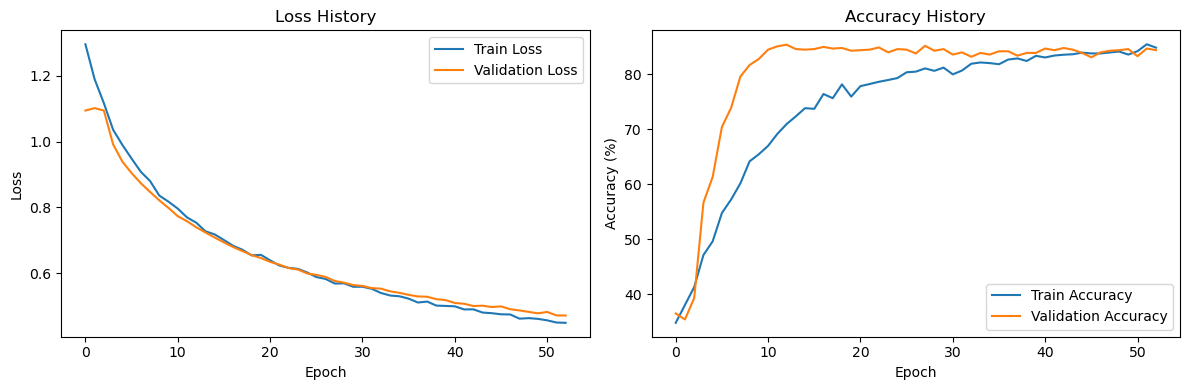

Early stopping at epoch 268


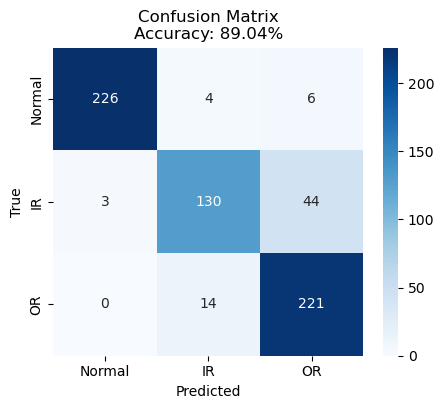

 - Model accuracy: 89.04%


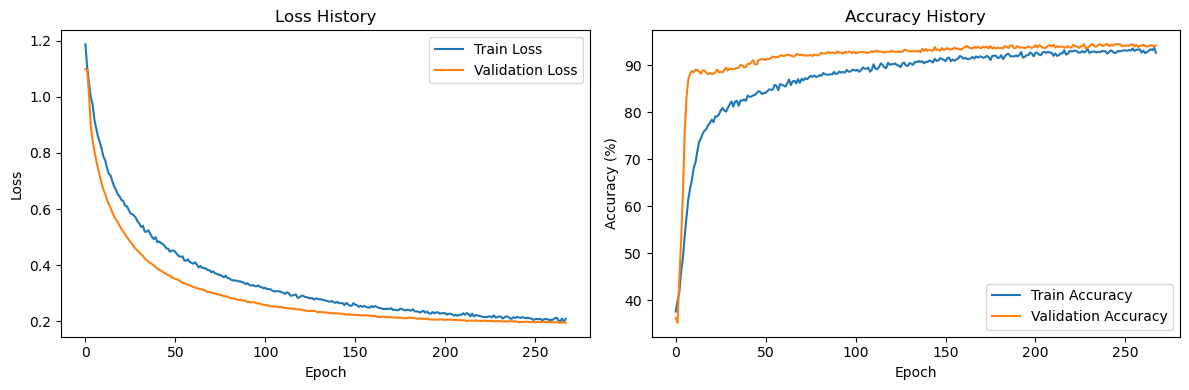

Early stopping at epoch 286


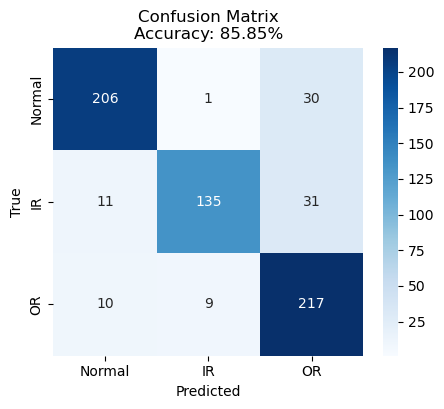

 - Model accuracy: 85.85%


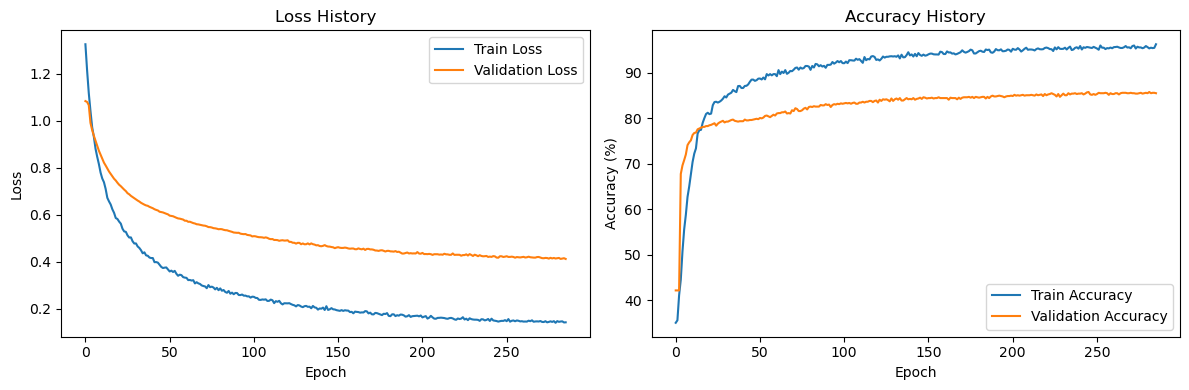

Early stopping at epoch 315


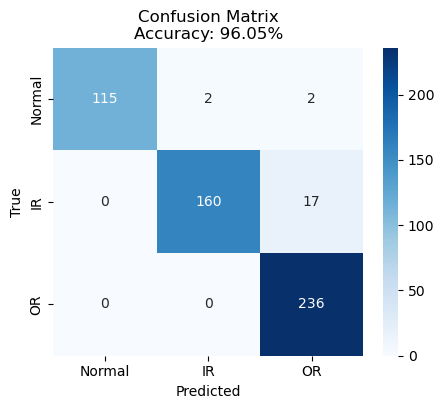

 - Model accuracy: 96.05%


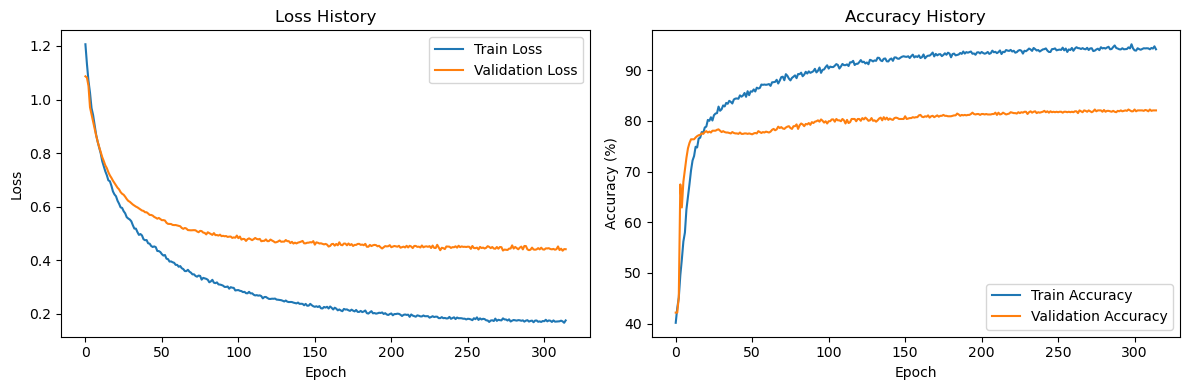

Early stopping at epoch 274


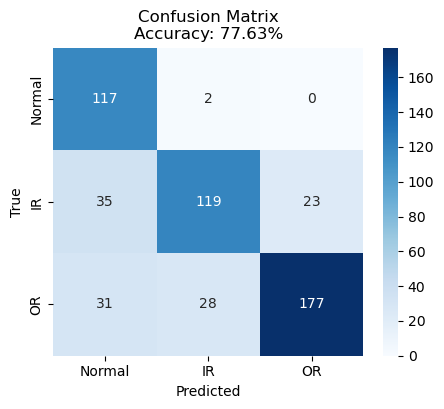

 - Model accuracy: 77.63%


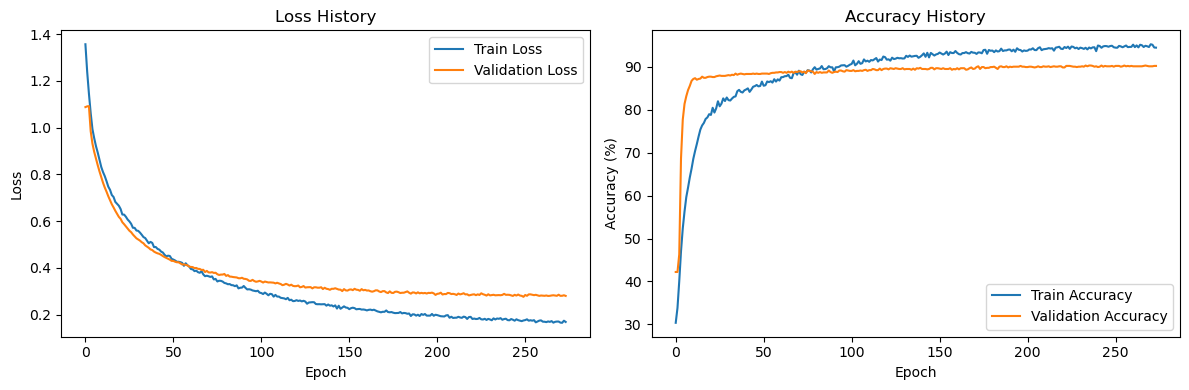

Mean accuracy: 0.8593731963303898
Std accuracy: 0.056562988316667576


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='simple_scale', scale_factor=10.0)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))